In [1]:
import pandas as pd

# Load the CSV file
df = pd.read_csv('hbase-0.95.2.csv')

df.head()

,File,CountDeclMethodPrivate,AvgLineCode,CountLine,MaxCyclomatic,CountDeclMethodDefault,AvgEssential,CountDeclClassVariable,SumCyclomaticStrict,AvgCyclomatic,...,OWN_LINE,OWN_COMMIT,MINOR_COMMIT,MINOR_LINE,MAJOR_COMMIT,MAJOR_LINE,HeuBug,HeuBugCount,RealBug,RealBugCount
0,dev-support/jenkins-tools/buildstats/src/main/...,0,3,49,1,0,1,0,5,1,...,1.0,1.0,0,1,1,0,False,0,False,0
1,dev-support/jenkins-tools/buildstats/src/main/...,0,6,87,8,0,1,0,15,2,...,1.0,1.0,0,1,1,0,False,0,False,0
2,dev-support/jenkins-tools/buildstats/src/main/...,0,3,61,1,0,1,0,9,1,...,1.0,1.0,0,1,1,0,False,0,False,0
3,dev-support/jenkins-tools/buildstats/src/main/...,1,21,260,18,3,2,5,43,5,...,1.0,1.0,0,1,1,0,False,0,False,0
4,dev-support/jenkins-tools/buildstats/src/main/...,0,3,47,1,0,1,0,5,1,...,1.0,1.0,0,1,1,0,False,0,False,0


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1834 entries, 0 to 1833
Data columns (total 70 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   File                       1834 non-null   object 
 1   CountDeclMethodPrivate     1834 non-null   int64  
 2   AvgLineCode                1834 non-null   int64  
 3   CountLine                  1834 non-null   int64  
 4   MaxCyclomatic              1834 non-null   int64  
 5   CountDeclMethodDefault     1834 non-null   int64  
 6   AvgEssential               1834 non-null   int64  
 7   CountDeclClassVariable     1834 non-null   int64  
 8   SumCyclomaticStrict        1834 non-null   int64  
 9   AvgCyclomatic              1834 non-null   int64  
 10  AvgLine                    1834 non-null   int64  
 11  CountDeclClassMethod       1834 non-null   int64  
 12  AvgLineComment             1834 non-null   int64  
 13  AvgCyclomaticModified      1834 non-null   int64

In [3]:
df.shape

(1834, 70)

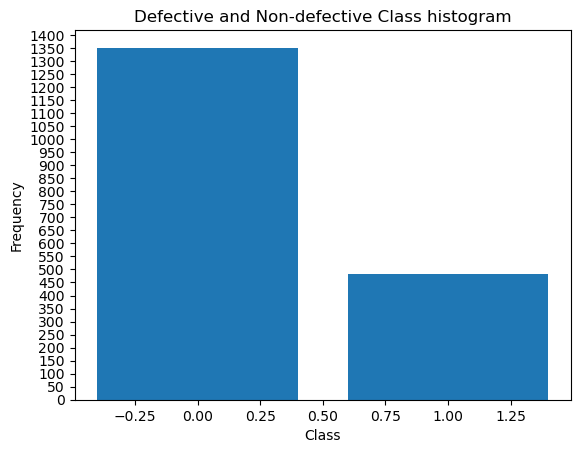

In [4]:
#Defective and Non-defective Class histogram
import matplotlib.pyplot as plt

# Count the occurrences of each class
class_counts = df['RealBug'].value_counts()

# Plot the histogram
plt.bar(class_counts.index, class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Defective and Non-defective Class histogram')
plt.xticks(rotation=0)
# show more numbers in frequency (y axis)
plt.gca().set_yticks(range(0, class_counts.max() + 50, 50))
# show the grid
# plt.grid(axis='y')
plt.show()


In [5]:
class_counts

RealBug
False    1351
True      483
Name: count, dtype: int64

<Axes: xlabel='RealBug', ylabel='CountLineCode'>

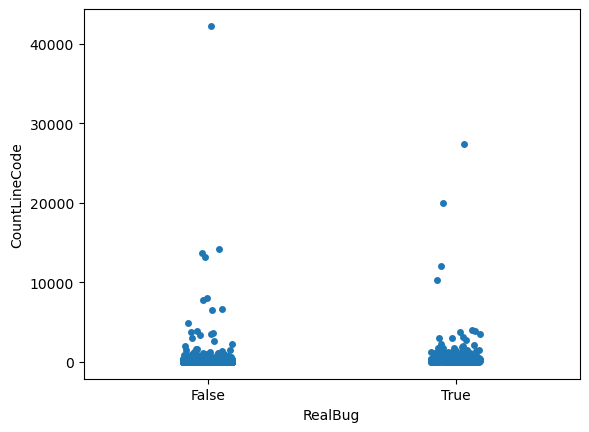

In [6]:
# Dispersion plot of class Defective
import seaborn as sns

sns.stripplot(x='RealBug', y='CountLineCode', data=df, jitter=True)

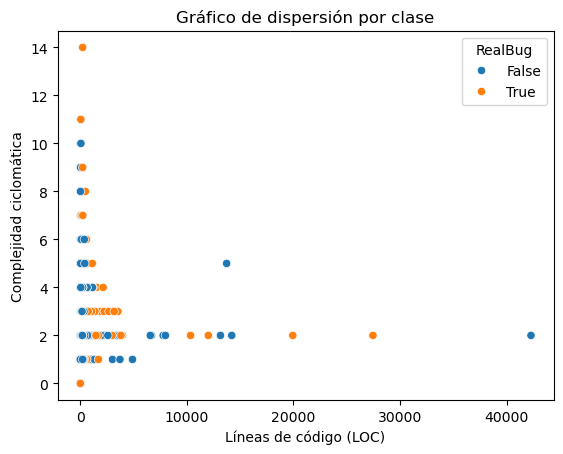

In [7]:
    # Suponiendo que las columnas relevantes para la visualización se llaman 'metric_1', 'metric_2' y 'class'
# Reemplaza 'metric_1' y 'metric_2' con los nombres reales de las columnas que quieres visualizar.
# 'class' es la columna que contiene la etiqueta de clase (defecto o no defecto).
sns.scatterplot(x='CountLineCode', y='AvgCyclomatic', hue='RealBug', data=df)

# Añadir títulos y etiquetas
plt.title('Gráfico de dispersión por clase')
plt.xlabel('Líneas de código (LOC)')
plt.ylabel('Complejidad ciclomática')
plt.show()